In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

### Loading the data

In [2]:
df=pd.read_csv(r'diabetes_dataset.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Exploring the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies      2000 non-null int64
Glucose          2000 non-null int64
BloodPressure    2000 non-null int64
SkinThickness    2000 non-null int64
Insulin          2000 non-null int64
BMI              2000 non-null float64
DPF              2000 non-null float64
Age              2000 non-null int64
Outcome          2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DPF,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


#### *We can notice that the missing values are replaced by 0, which is an incorrect imputation for columns: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'*

### Data Cleaning

#### *Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN*

In [6]:
df1=df.copy()
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

#### *As per the distribution of the columns we will replace the missing values*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0ED66F160>,
      dtype=object)

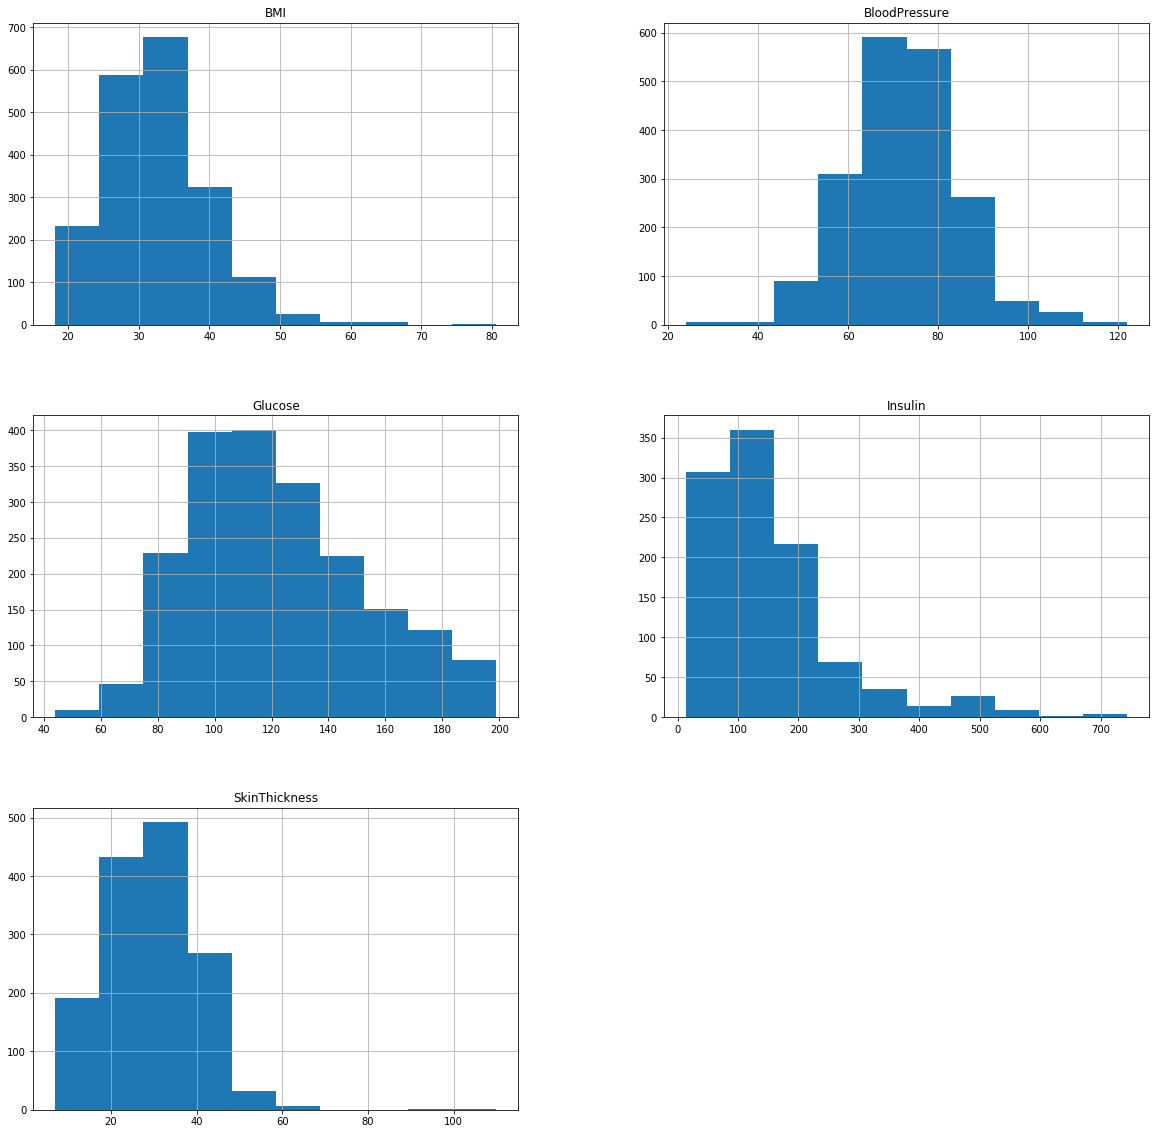

In [7]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(20,20))

In [8]:
#imputing using mean
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(),inplace=True)
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)

#imputing using median
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace=True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace=True)
df1['BMI'].fillna(df1['BMI'].median(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0ED7B9438>,
      dtype=object)

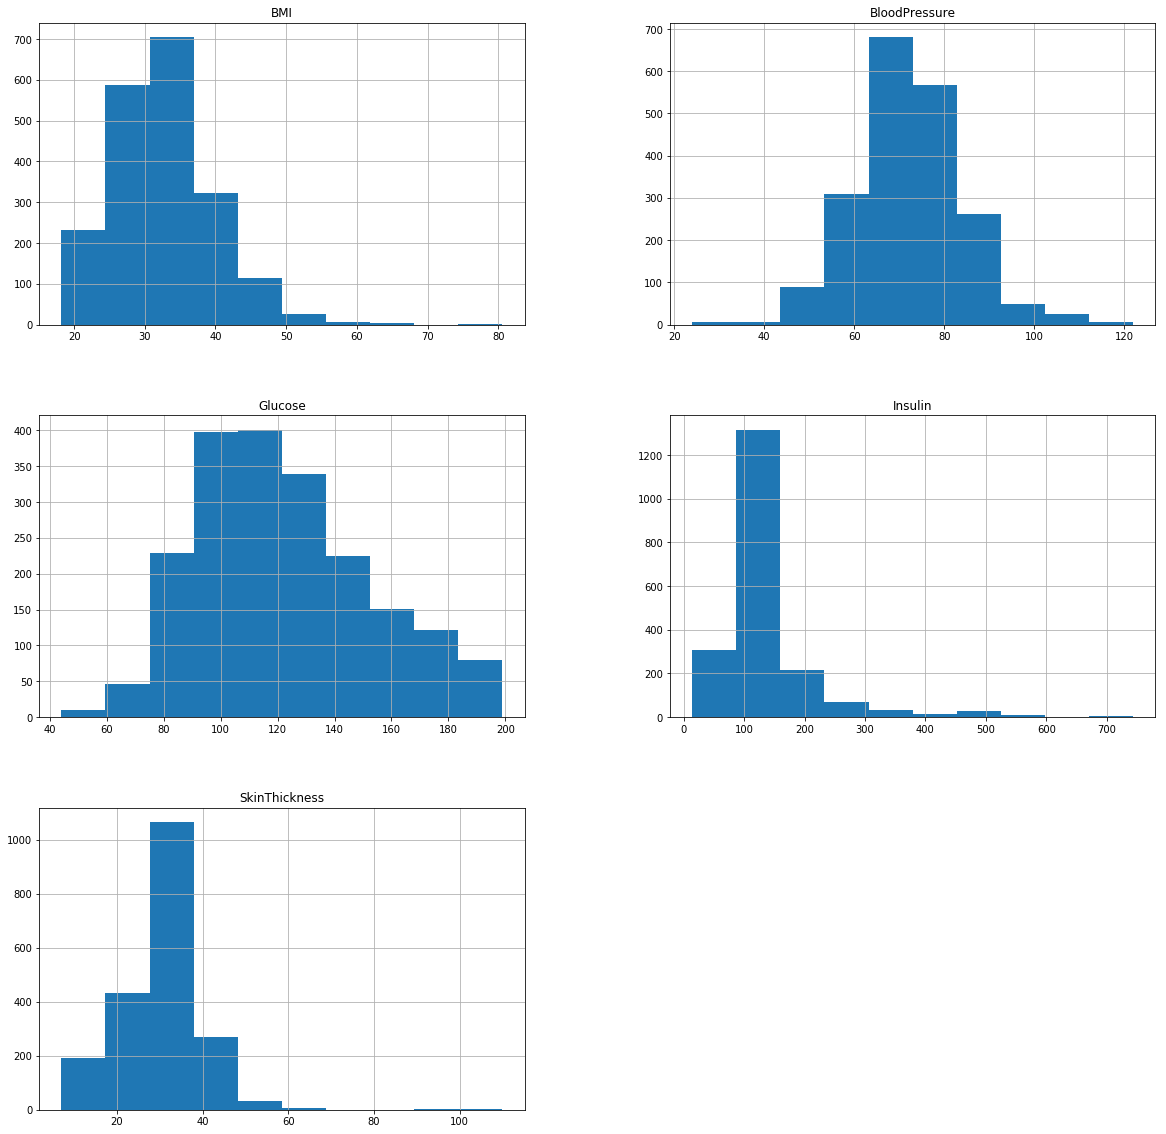

In [9]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(20,20))

In [10]:
df1.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns='Outcome')
y = df1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model selection

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

df_best_model=find_best_model(X_train, y_train)

In [14]:
df_best_model

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.895000
2,random_forest,{'n_estimators': 200},0.951250
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.864375


#### *Since Random Forest is giving the best accuracy, we will check cross_val_score for Random Forest*

In [15]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95.0%


### Model creation

In [16]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Model Evaluation

In [17]:
y_pred = classifier.predict(X_test)

print("Report on test dataset")
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Confusion Matrix")
cfm=confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification report:")
print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Report on test dataset
Confusion Matrix
[[272   0]
 [  2 126]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

   micro avg       0.99      0.99      0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

Accuracy: 0.995


### Prediction

In [18]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [19]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

0

### Creating a pickle file

In [20]:
import pickle
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))